## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  60.261813  1162.158837  0.615901  2.841391  1.547467
1  13.243250  1294.725177  0.820568  5.106595  1.679242
2  37.011641  1310.388869  0.411368  9.000701  1.456272
3   1.189972   616.839015  0.756472  5.613587  1.732612
4  32.380280  1579.404546  0.754512  5.050250  1.434461


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.14245 | train_mse: 5.74428 | train_mae: 1.78492 |  0:00:00s
epoch 1  | loss: 1.04432 | train_mse: 4.36712 | train_mae: 1.5695  |  0:00:00s


epoch 2  | loss: 1.04039 | train_mse: 3.91145 | train_mae: 1.4826  |  0:00:00s
epoch 3  | loss: 0.85622 | train_mse: 3.27909 | train_mae: 1.35946 |  0:00:00s


epoch 4  | loss: 0.84592 | train_mse: 2.97781 | train_mae: 1.29797 |  0:00:01s


epoch 5  | loss: 0.83518 | train_mse: 2.47114 | train_mae: 1.20076 |  0:00:01s
epoch 6  | loss: 0.95207 | train_mse: 2.0688  | train_mae: 1.10012 |  0:00:01s


epoch 7  | loss: 0.85865 | train_mse: 1.77842 | train_mae: 1.03142 |  0:00:01s
epoch 8  | loss: 0.73198 | train_mse: 1.50304 | train_mae: 0.9505  |  0:00:01s


epoch 9  | loss: 0.72256 | train_mse: 1.34159 | train_mae: 0.90451 |  0:00:02s


epoch 10 | loss: 0.75393 | train_mse: 1.23006 | train_mae: 0.87605 |  0:00:02s


epoch 11 | loss: 0.6765  | train_mse: 1.15353 | train_mae: 0.85218 |  0:00:02s


epoch 12 | loss: 0.67331 | train_mse: 1.06015 | train_mae: 0.82059 |  0:00:02s
epoch 13 | loss: 0.79164 | train_mse: 0.95488 | train_mae: 0.77976 |  0:00:03s


epoch 14 | loss: 0.63017 | train_mse: 0.86232 | train_mae: 0.74027 |  0:00:03s


epoch 15 | loss: 0.67628 | train_mse: 0.7934  | train_mae: 0.71089 |  0:00:03s


epoch 16 | loss: 0.58142 | train_mse: 0.74444 | train_mae: 0.68649 |  0:00:03s


epoch 17 | loss: 0.65053 | train_mse: 0.72277 | train_mae: 0.67644 |  0:00:04s


epoch 18 | loss: 0.55736 | train_mse: 0.7019  | train_mae: 0.66386 |  0:00:04s


epoch 19 | loss: 0.49769 | train_mse: 0.65888 | train_mae: 0.6383  |  0:00:04s
epoch 20 | loss: 0.4813  | train_mse: 0.63359 | train_mae: 0.62409 |  0:00:04s


epoch 21 | loss: 0.51077 | train_mse: 0.61521 | train_mae: 0.61616 |  0:00:05s


epoch 22 | loss: 0.60305 | train_mse: 0.59781 | train_mae: 0.60875 |  0:00:05s
epoch 23 | loss: 0.61499 | train_mse: 0.58033 | train_mae: 0.59935 |  0:00:05s


epoch 24 | loss: 0.51234 | train_mse: 0.55115 | train_mae: 0.58391 |  0:00:05s
epoch 25 | loss: 0.62371 | train_mse: 0.52665 | train_mae: 0.56995 |  0:00:05s


epoch 26 | loss: 0.40945 | train_mse: 0.49726 | train_mae: 0.55109 |  0:00:06s
epoch 27 | loss: 0.46366 | train_mse: 0.46964 | train_mae: 0.53441 |  0:00:06s


epoch 28 | loss: 0.55452 | train_mse: 0.45372 | train_mae: 0.52319 |  0:00:06s
epoch 29 | loss: 0.42539 | train_mse: 0.44524 | train_mae: 0.5176  |  0:00:06s


epoch 30 | loss: 0.56407 | train_mse: 0.44337 | train_mae: 0.51603 |  0:00:06s
epoch 31 | loss: 0.68412 | train_mse: 0.4435  | train_mae: 0.51602 |  0:00:06s


epoch 32 | loss: 0.48641 | train_mse: 0.43327 | train_mae: 0.50969 |  0:00:07s
epoch 33 | loss: 0.54895 | train_mse: 0.4319  | train_mae: 0.50591 |  0:00:07s


epoch 34 | loss: 0.6088  | train_mse: 0.42564 | train_mae: 0.49801 |  0:00:07s
epoch 35 | loss: 0.41842 | train_mse: 0.41751 | train_mae: 0.49251 |  0:00:07s


epoch 36 | loss: 0.40741 | train_mse: 0.4106  | train_mae: 0.48819 |  0:00:07s
epoch 37 | loss: 0.48268 | train_mse: 0.40088 | train_mae: 0.47872 |  0:00:07s


epoch 38 | loss: 0.46944 | train_mse: 0.37374 | train_mae: 0.4635  |  0:00:07s
epoch 39 | loss: 0.39804 | train_mse: 0.35353 | train_mae: 0.45121 |  0:00:07s
epoch 40 | loss: 0.4085  | train_mse: 0.33754 | train_mae: 0.44293 |  0:00:07s


epoch 41 | loss: 0.34743 | train_mse: 0.31918 | train_mae: 0.43292 |  0:00:08s
epoch 42 | loss: 0.53291 | train_mse: 0.30414 | train_mae: 0.42216 |  0:00:08s
epoch 43 | loss: 0.47874 | train_mse: 0.29624 | train_mae: 0.42137 |  0:00:08s


epoch 44 | loss: 0.37936 | train_mse: 0.29138 | train_mae: 0.41713 |  0:00:08s
epoch 45 | loss: 0.31795 | train_mse: 0.27886 | train_mae: 0.40732 |  0:00:08s
epoch 46 | loss: 0.47376 | train_mse: 0.26871 | train_mae: 0.39582 |  0:00:08s


epoch 47 | loss: 0.45822 | train_mse: 0.26301 | train_mae: 0.39383 |  0:00:08s
epoch 48 | loss: 0.34744 | train_mse: 0.25908 | train_mae: 0.39298 |  0:00:08s
epoch 49 | loss: 0.31523 | train_mse: 0.24755 | train_mae: 0.38757 |  0:00:08s


epoch 50 | loss: 0.26269 | train_mse: 0.23888 | train_mae: 0.38226 |  0:00:08s
epoch 51 | loss: 0.35549 | train_mse: 0.22782 | train_mae: 0.37152 |  0:00:08s
epoch 52 | loss: 0.3781  | train_mse: 0.21581 | train_mae: 0.36625 |  0:00:09s


epoch 53 | loss: 0.29156 | train_mse: 0.21158 | train_mae: 0.37019 |  0:00:09s
epoch 54 | loss: 0.2363  | train_mse: 0.20183 | train_mae: 0.3617  |  0:00:09s
epoch 55 | loss: 0.36591 | train_mse: 0.19186 | train_mae: 0.35265 |  0:00:09s


epoch 56 | loss: 0.35951 | train_mse: 0.18467 | train_mae: 0.34533 |  0:00:09s
epoch 57 | loss: 0.33843 | train_mse: 0.18336 | train_mae: 0.34332 |  0:00:09s
epoch 58 | loss: 0.21567 | train_mse: 0.26691 | train_mae: 0.3706  |  0:00:09s


epoch 59 | loss: 0.27381 | train_mse: 0.25618 | train_mae: 0.36913 |  0:00:09s
epoch 60 | loss: 0.36098 | train_mse: 0.26317 | train_mae: 0.37562 |  0:00:09s
epoch 61 | loss: 0.35305 | train_mse: 0.26164 | train_mae: 0.37594 |  0:00:09s


epoch 62 | loss: 0.30423 | train_mse: 0.2441  | train_mae: 0.36912 |  0:00:09s
epoch 63 | loss: 0.25574 | train_mse: 0.23473 | train_mae: 0.36441 |  0:00:10s
epoch 64 | loss: 0.29655 | train_mse: 0.22966 | train_mae: 0.36168 |  0:00:10s


epoch 65 | loss: 0.51328 | train_mse: 0.22664 | train_mae: 0.35786 |  0:00:10s
epoch 66 | loss: 0.28967 | train_mse: 0.22506 | train_mae: 0.3557  |  0:00:10s
epoch 67 | loss: 0.36962 | train_mse: 0.23282 | train_mae: 0.35843 |  0:00:10s


epoch 68 | loss: 0.27604 | train_mse: 0.23515 | train_mae: 0.35786 |  0:00:10s
epoch 69 | loss: 0.27269 | train_mse: 0.2489  | train_mae: 0.35624 |  0:00:10s
epoch 70 | loss: 0.2404  | train_mse: 0.26135 | train_mae: 0.35924 |  0:00:10s


epoch 71 | loss: 0.43357 | train_mse: 0.24931 | train_mae: 0.35497 |  0:00:10s
epoch 72 | loss: 0.38054 | train_mse: 0.22105 | train_mae: 0.3477  |  0:00:10s
epoch 73 | loss: 0.43656 | train_mse: 0.2172  | train_mae: 0.34656 |  0:00:10s


epoch 74 | loss: 0.2617  | train_mse: 0.21218 | train_mae: 0.34111 |  0:00:10s
epoch 75 | loss: 0.44367 | train_mse: 0.2162  | train_mae: 0.3455  |  0:00:11s
epoch 76 | loss: 0.33231 | train_mse: 0.21074 | train_mae: 0.34307 |  0:00:11s


epoch 77 | loss: 0.32037 | train_mse: 0.19944 | train_mae: 0.33711 |  0:00:11s
epoch 78 | loss: 0.44779 | train_mse: 0.19942 | train_mae: 0.33897 |  0:00:11s


epoch 79 | loss: 0.30933 | train_mse: 0.19499 | train_mae: 0.3371  |  0:00:11s
epoch 80 | loss: 0.22899 | train_mse: 0.18865 | train_mae: 0.333   |  0:00:11s
epoch 81 | loss: 0.24745 | train_mse: 0.18253 | train_mae: 0.33128 |  0:00:11s


epoch 82 | loss: 0.38627 | train_mse: 0.1743  | train_mae: 0.32546 |  0:00:11s
epoch 83 | loss: 0.51406 | train_mse: 0.16477 | train_mae: 0.31783 |  0:00:11s
epoch 84 | loss: 0.36409 | train_mse: 0.16111 | train_mae: 0.31602 |  0:00:11s


epoch 85 | loss: 0.31093 | train_mse: 0.15755 | train_mae: 0.31075 |  0:00:12s
epoch 86 | loss: 0.37164 | train_mse: 0.15613 | train_mae: 0.30886 |  0:00:12s
epoch 87 | loss: 0.2545  | train_mse: 0.15516 | train_mae: 0.30633 |  0:00:12s


epoch 88 | loss: 0.28006 | train_mse: 0.15479 | train_mae: 0.30843 |  0:00:12s
epoch 89 | loss: 0.2653  | train_mse: 0.15997 | train_mae: 0.31388 |  0:00:12s
epoch 90 | loss: 0.34387 | train_mse: 0.17547 | train_mae: 0.32118 |  0:00:12s


epoch 91 | loss: 0.46363 | train_mse: 0.18974 | train_mae: 0.32524 |  0:00:12s
epoch 92 | loss: 0.34804 | train_mse: 0.18766 | train_mae: 0.31978 |  0:00:12s
epoch 93 | loss: 0.49143 | train_mse: 0.19841 | train_mae: 0.31787 |  0:00:12s


epoch 94 | loss: 0.47088 | train_mse: 0.17429 | train_mae: 0.3059  |  0:00:12s
epoch 95 | loss: 0.2208  | train_mse: 0.16014 | train_mae: 0.30337 |  0:00:12s


epoch 96 | loss: 0.48597 | train_mse: 0.15563 | train_mae: 0.30226 |  0:00:13s


epoch 97 | loss: 0.36498 | train_mse: 0.15928 | train_mae: 0.30211 |  0:00:13s


epoch 98 | loss: 0.27538 | train_mse: 0.17314 | train_mae: 0.30671 |  0:00:13s
epoch 99 | loss: 0.25285 | train_mse: 0.17807 | train_mae: 0.30745 |  0:00:13s


epoch 100| loss: 0.35009 | train_mse: 0.17823 | train_mae: 0.30396 |  0:00:13s
epoch 101| loss: 0.33093 | train_mse: 0.13704 | train_mae: 0.28427 |  0:00:13s


epoch 102| loss: 0.30514 | train_mse: 0.12903 | train_mae: 0.27729 |  0:00:14s
epoch 103| loss: 0.17187 | train_mse: 0.12619 | train_mae: 0.27968 |  0:00:14s


epoch 104| loss: 0.37664 | train_mse: 0.12211 | train_mae: 0.2702  |  0:00:14s


epoch 105| loss: 0.21073 | train_mse: 0.11909 | train_mae: 0.26515 |  0:00:14s


epoch 106| loss: 0.29564 | train_mse: 0.11903 | train_mae: 0.26422 |  0:00:14s
epoch 107| loss: 0.21886 | train_mse: 0.11744 | train_mae: 0.26078 |  0:00:15s


epoch 108| loss: 0.35117 | train_mse: 0.12073 | train_mae: 0.26575 |  0:00:15s


epoch 109| loss: 0.31657 | train_mse: 0.12491 | train_mae: 0.27158 |  0:00:15s
epoch 110| loss: 0.33921 | train_mse: 0.12228 | train_mae: 0.26527 |  0:00:15s
epoch 111| loss: 0.31452 | train_mse: 0.12094 | train_mae: 0.26211 |  0:00:15s


epoch 112| loss: 0.38267 | train_mse: 0.12288 | train_mae: 0.26399 |  0:00:15s
epoch 113| loss: 0.31621 | train_mse: 0.12617 | train_mae: 0.27155 |  0:00:15s
epoch 114| loss: 0.47952 | train_mse: 0.12576 | train_mae: 0.27145 |  0:00:15s


epoch 115| loss: 0.19542 | train_mse: 0.12495 | train_mae: 0.27249 |  0:00:16s
epoch 116| loss: 0.28893 | train_mse: 0.12443 | train_mae: 0.27201 |  0:00:16s
epoch 117| loss: 0.28945 | train_mse: 0.12402 | train_mae: 0.27048 |  0:00:16s


epoch 118| loss: 0.18534 | train_mse: 0.12411 | train_mae: 0.26875 |  0:00:16s
epoch 119| loss: 0.29423 | train_mse: 0.12236 | train_mae: 0.26729 |  0:00:16s


epoch 120| loss: 0.21228 | train_mse: 0.12322 | train_mae: 0.27011 |  0:00:16s
epoch 121| loss: 0.29194 | train_mse: 0.12239 | train_mae: 0.26997 |  0:00:16s
epoch 122| loss: 0.34274 | train_mse: 0.12558 | train_mae: 0.27519 |  0:00:16s


epoch 123| loss: 0.30469 | train_mse: 0.12705 | train_mae: 0.27765 |  0:00:16s
epoch 124| loss: 0.40559 | train_mse: 0.12893 | train_mae: 0.28076 |  0:00:16s
epoch 125| loss: 0.27797 | train_mse: 0.12886 | train_mae: 0.28092 |  0:00:16s


epoch 126| loss: 0.22289 | train_mse: 0.12924 | train_mae: 0.2806  |  0:00:16s
epoch 127| loss: 0.50796 | train_mse: 0.12883 | train_mae: 0.28177 |  0:00:17s
epoch 128| loss: 0.36905 | train_mse: 0.12472 | train_mae: 0.27836 |  0:00:17s


epoch 129| loss: 0.18862 | train_mse: 0.12281 | train_mae: 0.27519 |  0:00:17s
epoch 130| loss: 0.32231 | train_mse: 0.12152 | train_mae: 0.2728  |  0:00:17s
epoch 131| loss: 0.22147 | train_mse: 0.11988 | train_mae: 0.27012 |  0:00:17s


epoch 132| loss: 0.37989 | train_mse: 0.11562 | train_mae: 0.26404 |  0:00:17s
epoch 133| loss: 0.23315 | train_mse: 0.11126 | train_mae: 0.25813 |  0:00:17s
epoch 134| loss: 0.21865 | train_mse: 0.10499 | train_mae: 0.25276 |  0:00:17s


epoch 135| loss: 0.24968 | train_mse: 0.10268 | train_mae: 0.25009 |  0:00:17s
epoch 136| loss: 0.30688 | train_mse: 0.10051 | train_mae: 0.24711 |  0:00:17s
epoch 137| loss: 0.2331  | train_mse: 0.09872 | train_mae: 0.24241 |  0:00:17s


epoch 138| loss: 0.23742 | train_mse: 0.09779 | train_mae: 0.24096 |  0:00:18s
epoch 139| loss: 0.28257 | train_mse: 0.09827 | train_mae: 0.24411 |  0:00:18s


epoch 140| loss: 0.13331 | train_mse: 0.10396 | train_mae: 0.25294 |  0:00:18s
epoch 141| loss: 0.3465  | train_mse: 0.11054 | train_mae: 0.26364 |  0:00:18s


epoch 142| loss: 0.20426 | train_mse: 0.11627 | train_mae: 0.27054 |  0:00:18s
epoch 143| loss: 0.20447 | train_mse: 0.11947 | train_mae: 0.27408 |  0:00:18s
epoch 144| loss: 0.16576 | train_mse: 0.11371 | train_mae: 0.26863 |  0:00:18s


epoch 145| loss: 0.27491 | train_mse: 0.10594 | train_mae: 0.25771 |  0:00:18s
epoch 146| loss: 0.17961 | train_mse: 0.1041  | train_mae: 0.25315 |  0:00:18s
epoch 147| loss: 0.22179 | train_mse: 0.10771 | train_mae: 0.25293 |  0:00:18s


epoch 148| loss: 0.24411 | train_mse: 0.1041  | train_mae: 0.24768 |  0:00:18s
epoch 149| loss: 0.14699 | train_mse: 0.10442 | train_mae: 0.24801 |  0:00:19s
epoch 150| loss: 0.13593 | train_mse: 0.10336 | train_mae: 0.24667 |  0:00:19s


epoch 151| loss: 0.13406 | train_mse: 0.10038 | train_mae: 0.24287 |  0:00:19s
epoch 152| loss: 0.13428 | train_mse: 0.09291 | train_mae: 0.23708 |  0:00:19s
epoch 153| loss: 0.16061 | train_mse: 0.08833 | train_mae: 0.23459 |  0:00:19s


epoch 154| loss: 0.17615 | train_mse: 0.08534 | train_mae: 0.23232 |  0:00:19s
epoch 155| loss: 0.30503 | train_mse: 0.0829  | train_mae: 0.23117 |  0:00:19s
epoch 156| loss: 0.18376 | train_mse: 0.08128 | train_mae: 0.22907 |  0:00:19s


epoch 157| loss: 0.17765 | train_mse: 0.08024 | train_mae: 0.22727 |  0:00:19s
epoch 158| loss: 0.20032 | train_mse: 0.081   | train_mae: 0.22854 |  0:00:19s
epoch 159| loss: 0.2199  | train_mse: 0.08163 | train_mae: 0.23086 |  0:00:19s


epoch 160| loss: 0.2791  | train_mse: 0.08119 | train_mae: 0.2322  |  0:00:20s
epoch 161| loss: 0.18411 | train_mse: 0.08181 | train_mae: 0.2349  |  0:00:20s
epoch 162| loss: 0.2934  | train_mse: 0.08492 | train_mae: 0.2375  |  0:00:20s


epoch 163| loss: 0.23913 | train_mse: 0.09439 | train_mae: 0.24646 |  0:00:20s
epoch 164| loss: 0.15479 | train_mse: 0.10015 | train_mae: 0.25296 |  0:00:20s
epoch 165| loss: 0.28744 | train_mse: 0.10789 | train_mae: 0.25731 |  0:00:20s


epoch 166| loss: 0.177   | train_mse: 0.1108  | train_mae: 0.25948 |  0:00:20s
epoch 167| loss: 0.15012 | train_mse: 0.10808 | train_mae: 0.25619 |  0:00:20s
epoch 168| loss: 0.15702 | train_mse: 0.11057 | train_mae: 0.25839 |  0:00:20s


epoch 169| loss: 0.15241 | train_mse: 0.10899 | train_mae: 0.25675 |  0:00:20s
epoch 170| loss: 0.35105 | train_mse: 0.10147 | train_mae: 0.24857 |  0:00:20s
epoch 171| loss: 0.23048 | train_mse: 0.0935  | train_mae: 0.24022 |  0:00:20s


epoch 172| loss: 0.26327 | train_mse: 0.08983 | train_mae: 0.23632 |  0:00:21s
epoch 173| loss: 0.42203 | train_mse: 0.08278 | train_mae: 0.22871 |  0:00:21s
epoch 174| loss: 0.1774  | train_mse: 0.08297 | train_mae: 0.22915 |  0:00:21s


epoch 175| loss: 0.3591  | train_mse: 0.08205 | train_mae: 0.22687 |  0:00:21s
epoch 176| loss: 0.12355 | train_mse: 0.08358 | train_mae: 0.2276  |  0:00:21s
epoch 177| loss: 0.2354  | train_mse: 0.08493 | train_mae: 0.23011 |  0:00:21s


epoch 178| loss: 0.15539 | train_mse: 0.08638 | train_mae: 0.23247 |  0:00:21s
epoch 179| loss: 0.41167 | train_mse: 0.08958 | train_mae: 0.23659 |  0:00:21s
epoch 180| loss: 0.16545 | train_mse: 0.09316 | train_mae: 0.24085 |  0:00:21s


epoch 181| loss: 0.22927 | train_mse: 0.09521 | train_mae: 0.24424 |  0:00:21s
epoch 182| loss: 0.19119 | train_mse: 0.09195 | train_mae: 0.24105 |  0:00:21s
epoch 183| loss: 0.28646 | train_mse: 0.09368 | train_mae: 0.24549 |  0:00:21s


epoch 184| loss: 0.16168 | train_mse: 0.09793 | train_mae: 0.25115 |  0:00:22s
epoch 185| loss: 0.16528 | train_mse: 0.09843 | train_mae: 0.25223 |  0:00:22s
epoch 186| loss: 0.1914  | train_mse: 0.09485 | train_mae: 0.24873 |  0:00:22s


epoch 187| loss: 0.18189 | train_mse: 0.09226 | train_mae: 0.24497 |  0:00:22s
epoch 188| loss: 0.28152 | train_mse: 0.08637 | train_mae: 0.23733 |  0:00:22s
epoch 189| loss: 0.38339 | train_mse: 0.0827  | train_mae: 0.23232 |  0:00:22s


epoch 190| loss: 0.20736 | train_mse: 0.0799  | train_mae: 0.22866 |  0:00:22s


epoch 191| loss: 0.17288 | train_mse: 0.07631 | train_mae: 0.22717 |  0:00:22s
epoch 192| loss: 0.18582 | train_mse: 0.07581 | train_mae: 0.22869 |  0:00:22s
epoch 193| loss: 0.25583 | train_mse: 0.07533 | train_mae: 0.22615 |  0:00:23s


epoch 194| loss: 0.1376  | train_mse: 0.07568 | train_mae: 0.22584 |  0:00:23s
epoch 195| loss: 0.20649 | train_mse: 0.07419 | train_mae: 0.22335 |  0:00:23s


epoch 196| loss: 0.20544 | train_mse: 0.07217 | train_mae: 0.22026 |  0:00:23s
epoch 197| loss: 0.31    | train_mse: 0.06965 | train_mae: 0.2151  |  0:00:23s
epoch 198| loss: 0.18351 | train_mse: 0.06986 | train_mae: 0.21483 |  0:00:23s


epoch 199| loss: 0.17911 | train_mse: 0.07112 | train_mae: 0.21429 |  0:00:23s
epoch 200| loss: 0.15552 | train_mse: 0.07159 | train_mae: 0.21651 |  0:00:23s
epoch 201| loss: 0.37693 | train_mse: 0.07173 | train_mae: 0.21909 |  0:00:23s


epoch 202| loss: 0.35107 | train_mse: 0.07158 | train_mae: 0.22027 |  0:00:23s
epoch 203| loss: 0.1591  | train_mse: 0.07318 | train_mae: 0.22311 |  0:00:23s
epoch 204| loss: 0.16415 | train_mse: 0.07509 | train_mae: 0.22492 |  0:00:24s


epoch 205| loss: 0.17244 | train_mse: 0.07663 | train_mae: 0.22586 |  0:00:24s
epoch 206| loss: 0.21797 | train_mse: 0.07701 | train_mae: 0.22545 |  0:00:24s


epoch 207| loss: 0.15726 | train_mse: 0.07759 | train_mae: 0.22494 |  0:00:24s
epoch 208| loss: 0.16287 | train_mse: 0.07875 | train_mae: 0.22446 |  0:00:24s
epoch 209| loss: 0.13783 | train_mse: 0.07729 | train_mae: 0.22062 |  0:00:24s


epoch 210| loss: 0.13993 | train_mse: 0.07791 | train_mae: 0.22065 |  0:00:24s
epoch 211| loss: 0.15218 | train_mse: 0.07949 | train_mae: 0.22391 |  0:00:24s
epoch 212| loss: 0.23795 | train_mse: 0.08298 | train_mae: 0.22894 |  0:00:24s


epoch 213| loss: 0.44788 | train_mse: 0.08308 | train_mae: 0.23028 |  0:00:24s
epoch 214| loss: 0.13978 | train_mse: 0.08453 | train_mae: 0.23133 |  0:00:24s
epoch 215| loss: 0.18996 | train_mse: 0.08256 | train_mae: 0.22906 |  0:00:25s


epoch 216| loss: 0.15086 | train_mse: 0.08177 | train_mae: 0.23051 |  0:00:25s
epoch 217| loss: 0.18129 | train_mse: 0.08026 | train_mae: 0.22749 |  0:00:25s
epoch 218| loss: 0.23555 | train_mse: 0.07941 | train_mae: 0.22553 |  0:00:25s


epoch 219| loss: 0.16027 | train_mse: 0.0796  | train_mae: 0.22517 |  0:00:25s
epoch 220| loss: 0.11237 | train_mse: 0.08032 | train_mae: 0.22565 |  0:00:25s
epoch 221| loss: 0.21987 | train_mse: 0.08903 | train_mae: 0.23148 |  0:00:25s


epoch 222| loss: 0.13073 | train_mse: 0.08303 | train_mae: 0.22702 |  0:00:25s
epoch 223| loss: 0.14233 | train_mse: 0.0822  | train_mae: 0.22552 |  0:00:25s
epoch 224| loss: 0.38952 | train_mse: 0.0821  | train_mae: 0.22677 |  0:00:25s


epoch 225| loss: 0.14945 | train_mse: 0.08361 | train_mae: 0.23055 |  0:00:25s
epoch 226| loss: 0.18077 | train_mse: 0.08654 | train_mae: 0.23607 |  0:00:26s
epoch 227| loss: 0.26584 | train_mse: 0.09152 | train_mae: 0.24079 |  0:00:26s


epoch 228| loss: 0.14501 | train_mse: 0.09003 | train_mae: 0.23905 |  0:00:26s
epoch 229| loss: 0.27407 | train_mse: 0.08352 | train_mae: 0.23226 |  0:00:26s
epoch 230| loss: 0.18686 | train_mse: 0.0797  | train_mae: 0.22917 |  0:00:26s


epoch 231| loss: 0.12337 | train_mse: 0.07777 | train_mae: 0.22856 |  0:00:26s
epoch 232| loss: 0.207   | train_mse: 0.07502 | train_mae: 0.22607 |  0:00:26s
epoch 233| loss: 0.12062 | train_mse: 0.07502 | train_mae: 0.22605 |  0:00:26s


epoch 234| loss: 0.13127 | train_mse: 0.07508 | train_mae: 0.22537 |  0:00:26s
epoch 235| loss: 0.2545  | train_mse: 0.07524 | train_mae: 0.22702 |  0:00:26s
epoch 236| loss: 0.30874 | train_mse: 0.07034 | train_mae: 0.22046 |  0:00:26s


epoch 237| loss: 0.24589 | train_mse: 0.06449 | train_mae: 0.21245 |  0:00:26s
epoch 238| loss: 0.15426 | train_mse: 0.06143 | train_mae: 0.20774 |  0:00:27s
epoch 239| loss: 0.12009 | train_mse: 0.05961 | train_mae: 0.20473 |  0:00:27s


epoch 240| loss: 0.08291 | train_mse: 0.05876 | train_mae: 0.20368 |  0:00:27s
epoch 241| loss: 0.2583  | train_mse: 0.05926 | train_mae: 0.20182 |  0:00:27s


epoch 242| loss: 0.24581 | train_mse: 0.06051 | train_mae: 0.20288 |  0:00:27s
epoch 243| loss: 0.31364 | train_mse: 0.06137 | train_mae: 0.20477 |  0:00:27s
epoch 244| loss: 0.35105 | train_mse: 0.06433 | train_mae: 0.2092  |  0:00:27s


epoch 245| loss: 0.15092 | train_mse: 0.08452 | train_mae: 0.2249  |  0:00:27s
epoch 246| loss: 0.3131  | train_mse: 0.07727 | train_mae: 0.22157 |  0:00:27s
epoch 247| loss: 0.13499 | train_mse: 0.08017 | train_mae: 0.22438 |  0:00:27s


epoch 248| loss: 0.17597 | train_mse: 0.08263 | train_mae: 0.22711 |  0:00:27s
epoch 249| loss: 0.38691 | train_mse: 0.08532 | train_mae: 0.23173 |  0:00:28s
epoch 250| loss: 0.33818 | train_mse: 0.08786 | train_mae: 0.23444 |  0:00:28s


epoch 251| loss: 0.14542 | train_mse: 0.08967 | train_mae: 0.23739 |  0:00:28s
epoch 252| loss: 0.11052 | train_mse: 0.09374 | train_mae: 0.2411  |  0:00:28s


epoch 253| loss: 0.16053 | train_mse: 0.09262 | train_mae: 0.24119 |  0:00:28s
epoch 254| loss: 0.15239 | train_mse: 0.08898 | train_mae: 0.238   |  0:00:28s
epoch 255| loss: 0.15673 | train_mse: 0.08656 | train_mae: 0.23488 |  0:00:28s


epoch 256| loss: 0.1942  | train_mse: 0.08291 | train_mae: 0.2289  |  0:00:28s
epoch 257| loss: 0.42837 | train_mse: 0.07864 | train_mae: 0.22477 |  0:00:28s
epoch 258| loss: 0.47449 | train_mse: 0.07816 | train_mae: 0.22538 |  0:00:28s


epoch 259| loss: 0.12187 | train_mse: 0.07964 | train_mae: 0.22816 |  0:00:28s
epoch 260| loss: 0.17178 | train_mse: 0.08188 | train_mae: 0.23143 |  0:00:29s
epoch 261| loss: 0.16329 | train_mse: 0.08033 | train_mae: 0.22918 |  0:00:29s


epoch 262| loss: 0.15675 | train_mse: 0.07656 | train_mae: 0.22442 |  0:00:29s
epoch 263| loss: 0.21597 | train_mse: 0.07484 | train_mae: 0.22134 |  0:00:29s
epoch 264| loss: 0.13818 | train_mse: 0.07394 | train_mae: 0.21903 |  0:00:29s


epoch 265| loss: 0.20961 | train_mse: 0.07256 | train_mae: 0.2163  |  0:00:29s
epoch 266| loss: 0.23018 | train_mse: 0.07059 | train_mae: 0.21394 |  0:00:29s
epoch 267| loss: 0.12662 | train_mse: 0.06908 | train_mae: 0.212   |  0:00:29s


epoch 268| loss: 0.16943 | train_mse: 0.06781 | train_mae: 0.21023 |  0:00:29s
epoch 269| loss: 0.29165 | train_mse: 0.06678 | train_mae: 0.21049 |  0:00:29s
epoch 270| loss: 0.10901 | train_mse: 0.06513 | train_mae: 0.21108 |  0:00:29s


epoch 271| loss: 0.24154 | train_mse: 0.06449 | train_mae: 0.21134 |  0:00:29s
epoch 272| loss: 0.40522 | train_mse: 0.06453 | train_mae: 0.21086 |  0:00:30s
epoch 273| loss: 0.22042 | train_mse: 0.06349 | train_mae: 0.20896 |  0:00:30s


epoch 274| loss: 0.12445 | train_mse: 0.06372 | train_mae: 0.20865 |  0:00:30s
epoch 275| loss: 0.13975 | train_mse: 0.07005 | train_mae: 0.21724 |  0:00:30s
epoch 276| loss: 0.11166 | train_mse: 0.07486 | train_mae: 0.223   |  0:00:30s


epoch 277| loss: 0.19524 | train_mse: 0.0755  | train_mae: 0.22415 |  0:00:30s
epoch 278| loss: 0.1436  | train_mse: 0.07267 | train_mae: 0.22148 |  0:00:30s
epoch 279| loss: 0.1985  | train_mse: 0.0695  | train_mae: 0.21729 |  0:00:30s


epoch 280| loss: 0.15758 | train_mse: 0.06728 | train_mae: 0.21472 |  0:00:30s
epoch 281| loss: 0.20094 | train_mse: 0.0649  | train_mae: 0.21154 |  0:00:30s
epoch 282| loss: 0.26363 | train_mse: 0.06276 | train_mae: 0.20953 |  0:00:30s


epoch 283| loss: 0.20492 | train_mse: 0.06289 | train_mae: 0.21287 |  0:00:31s
epoch 284| loss: 0.10653 | train_mse: 0.0646  | train_mae: 0.21637 |  0:00:31s
epoch 285| loss: 0.17715 | train_mse: 0.06436 | train_mae: 0.2193  |  0:00:31s


epoch 286| loss: 0.21083 | train_mse: 0.06596 | train_mae: 0.2218  |  0:00:31s
epoch 287| loss: 0.19521 | train_mse: 0.06568 | train_mae: 0.22086 |  0:00:31s


epoch 288| loss: 0.16754 | train_mse: 0.06454 | train_mae: 0.21753 |  0:00:31s
epoch 289| loss: 0.10433 | train_mse: 0.06347 | train_mae: 0.21528 |  0:00:31s


epoch 290| loss: 0.14668 | train_mse: 0.06168 | train_mae: 0.2123  |  0:00:31s
epoch 291| loss: 0.16937 | train_mse: 0.05902 | train_mae: 0.20628 |  0:00:31s

Early stopping occurred at epoch 291 with best_epoch = 241 and best_train_mae = 0.20182
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4643818899128872


ABC Pre-generator MAE 0.44844636798931325


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

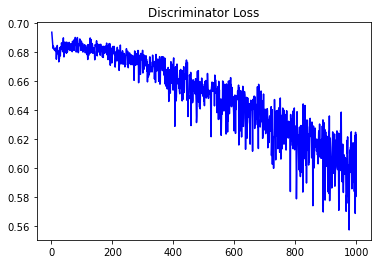

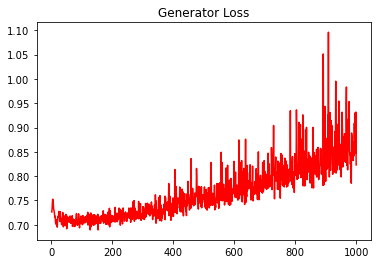

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.564473144941032


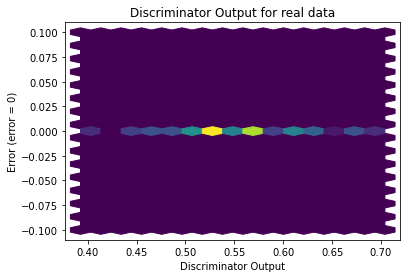

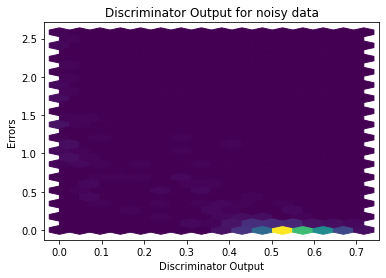

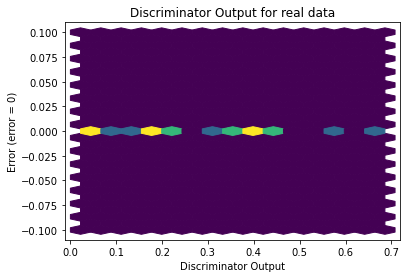

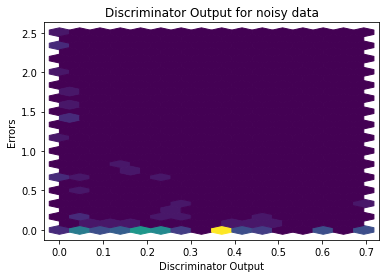

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


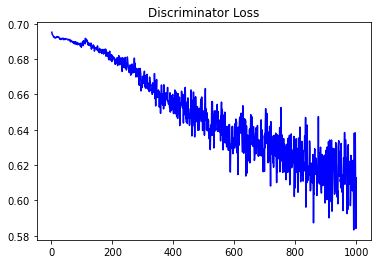

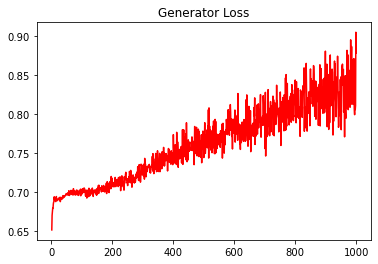

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.515754122313112


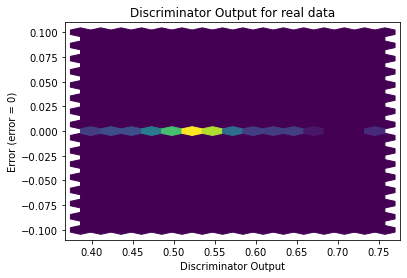

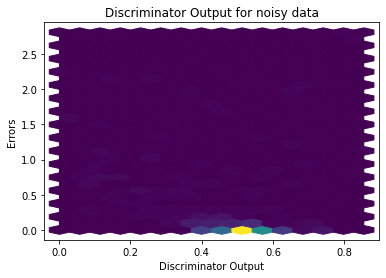

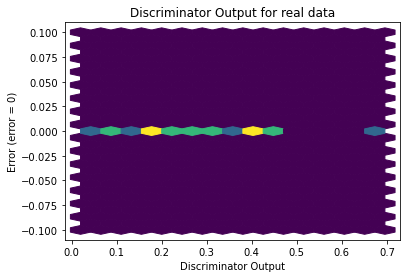

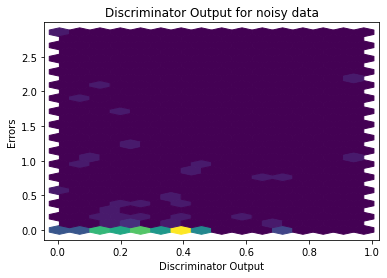

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1804]], requires_grad=True)
